#### Mbox is a generic term for a family of related file formats used for holding collections of email messages. It was first implemented in Fifth Edition Unix.
#### All messages in an mbox mailbox are concatenated and stored as plain text in a single file. Each message starts with the four characters "From" followed by a space (the so-called "From_ line") and the sender's email address.

In [1]:
filepath = '/cxldata/datasets/project/mbox-short.txt'
def number_of_lines():   
    fhand = open('/cxldata/datasets/project/mbox-short.txt')
    inp = fhand.read()
    fhand.close()
    count = 0
    for i in inp:
        if i == '\n':
            count += 1
    return count

# Remarks -->  Good work!! But remember to use read() only when you know file
# is relatively small compared to the size of your main memory

In [2]:
# filepath = '/cxldata/datasets/project/mbox-short.txt'
# def number_of_lines():
#     with open(filepath) as f:
#         total_lines = len(f.readlines())
#         print(total_lines)

In [3]:
fhand = open('/cxldata/datasets/project/mbox-short.txt')
count = 0
for line in fhand:
    line = line.rstrip() # Remove new line characters from right
    if line.startswith('From:'):
        print(line)

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


In [4]:
def count_number_of_lines():
    count = 0
    with open('/cxldata/datasets/project/mbox-short.txt') as f:
        for line in f:
            line = line.rstrip()
            if line.startswith('Subject:'):
                count += 1
        return count

In [5]:
count_number_of_lines()

27

In [6]:
def average_spam_confidence():
    with open('/cxldata/datasets/project/mbox-short.txt') as f:
        count = 0
        spam_confidence_sum = 0
        for line in f:
            line = line.rstrip() # Remove new line characters from right
            if line.startswith('X-DSPAM-Confidence:'):
                var, value = line.split(':')
                spam_confidence_sum = spam_confidence_sum + float(value)
                count = count + 1
    return spam_confidence_sum/count

In [7]:
average_spam_confidence()

0.7507185185185187

In [8]:
def find_email_sent_days():
    with open('/cxldata/datasets/project/mbox-short.txt') as f:
        read_line_by_line = f.readlines()
        dict_days = {}
        for l in read_line_by_line:
            if l.startswith('From '):
                third_w = l.split(' ')[2]
                keys = dict_days.keys()
                if third_w in keys:
                    dict_days[third_w] += 1
                else:
                    dict_days[third_w] = 1
        return(dict_days)

In [9]:
find_email_sent_days()

{'Sat': 1, 'Fri': 20, 'Thu': 6}

In [10]:
def count_message_from_email():
    with open('/cxldata/datasets/project/mbox-short.txt') as f:
        email_dict = {}
        for line in f.readlines():
            line = line.strip()
            if line.startswith('From:') and line.find('@'):
                email = line.split(' ')[1]
                if email not in email_dict:
                    email_dict[email] = 1
                else:
                    email_dict[email] += 1
        return email_dict

In [11]:
count_message_from_email()

{'stephen.marquard@uct.ac.za': 2,
 'louis@media.berkeley.edu': 3,
 'zqian@umich.edu': 4,
 'rjlowe@iupui.edu': 2,
 'cwen@iupui.edu': 5,
 'gsilver@umich.edu': 3,
 'wagnermr@iupui.edu': 1,
 'antranig@caret.cam.ac.uk': 1,
 'gopal.ramasammycook@gmail.com': 1,
 'david.horwitz@uct.ac.za': 4,
 'ray@media.berkeley.edu': 1}

In [21]:
import matplotlib.pyplot as plt


In [23]:
email_dict = {'stephen.marquard@uct.ac.za': 2,
 'louis@media.berkeley.edu': 3,
 'zqian@umich.edu': 4,
 'rjlowe@iupui.edu': 2,
 'cwen@iupui.edu': 5,
 'gsilver@umich.edu': 3,
 'wagnermr@iupui.edu': 1,
 'antranig@caret.cam.ac.uk': 1,
 'gopal.ramasammycook@gmail.com': 1,
 'david.horwitz@uct.ac.za': 4,
 'ray@media.berkeley.edu': 1}

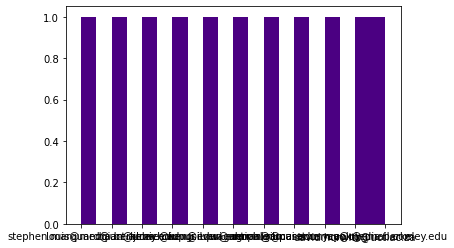

In [30]:
plt.hist(x=email_dict.keys(),data=email_dict.values(),bins=20,label="Number Of Msg From Each Email Id",color='indigo')
plt.show()

In [13]:
def count_message_from_domain():
    with open('/cxldata/datasets/project/mbox-short.txt') as f:
        domain_dict = {}
        for line in f.readlines():
            line = line.strip()
            if line.startswith('From:') and line.find('@'):
                d = line.split('@')[1]
                if d not in domain_dict:
                    domain_dict[d] = 1
                else:
                    domain_dict[d] += 1
        return domain_dict

In [14]:
count_message_from_domain()

{'uct.ac.za': 6,
 'media.berkeley.edu': 4,
 'umich.edu': 7,
 'iupui.edu': 8,
 'caret.cam.ac.uk': 1,
 'gmail.com': 1}

In [31]:
domain_dict = {'uct.ac.za': 6,
 'media.berkeley.edu': 4,
 'umich.edu': 7,
 'iupui.edu': 8,
 'caret.cam.ac.uk': 1,
 'gmail.com': 1}

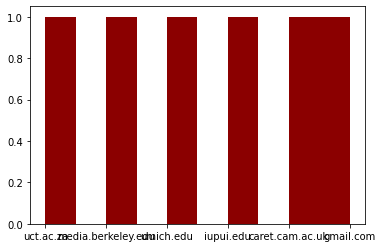

In [40]:
plt.hist(x=domain_dict.keys(),data=domain_dict.values(),bins=10,color='darkred',label="Number Of Msg From Each Domain")
plt.show()